# 3.2 LDA, KNN and Weighted KNN

### Data Set Up

In [81]:
from data.features import *

# All Features
X = features

X1 = features[feature_sets['logr']]
X2 = features[feature_sets['gini']]
X3 = features[feature_sets['permutation']]
X4 = features[feature_sets['shap']]
X5 = features[feature_sets['upper1'] + feature_sets['upper2']]
X6 = features[feature_sets['lower1'] + feature_sets['lower2']]

y1 = p_labels
y2 = d_labels

pose_classes = data['label']

## 3.2.1 Linear Discriminant Analysis (LDA) 

To achieve the objective of discerning the discriminative features among classes, Linear Discriminant Analysis (LDA) is employed. This approach aims to evaluate the sufficiency of features in delineating class separations and to ascertain whether classes with akin features can be clustered together.

LDA is also used as preprocessing for KNN.

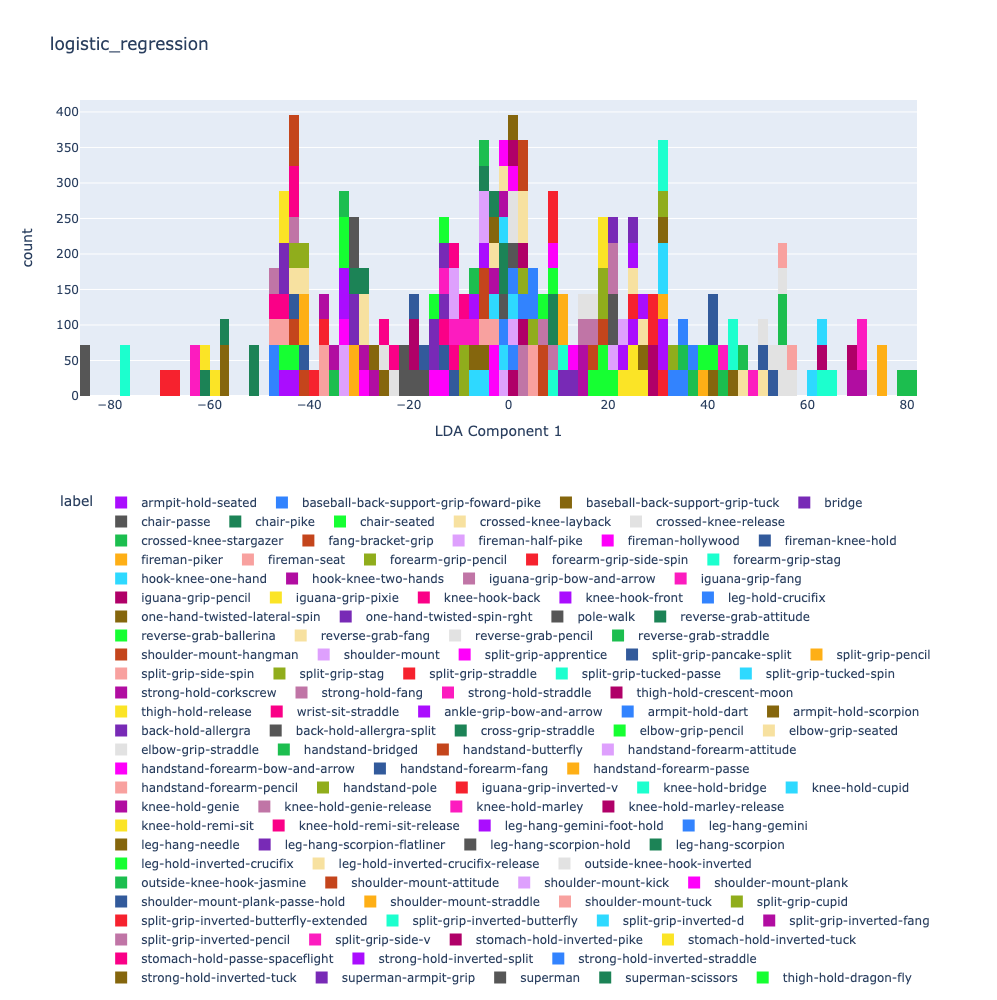

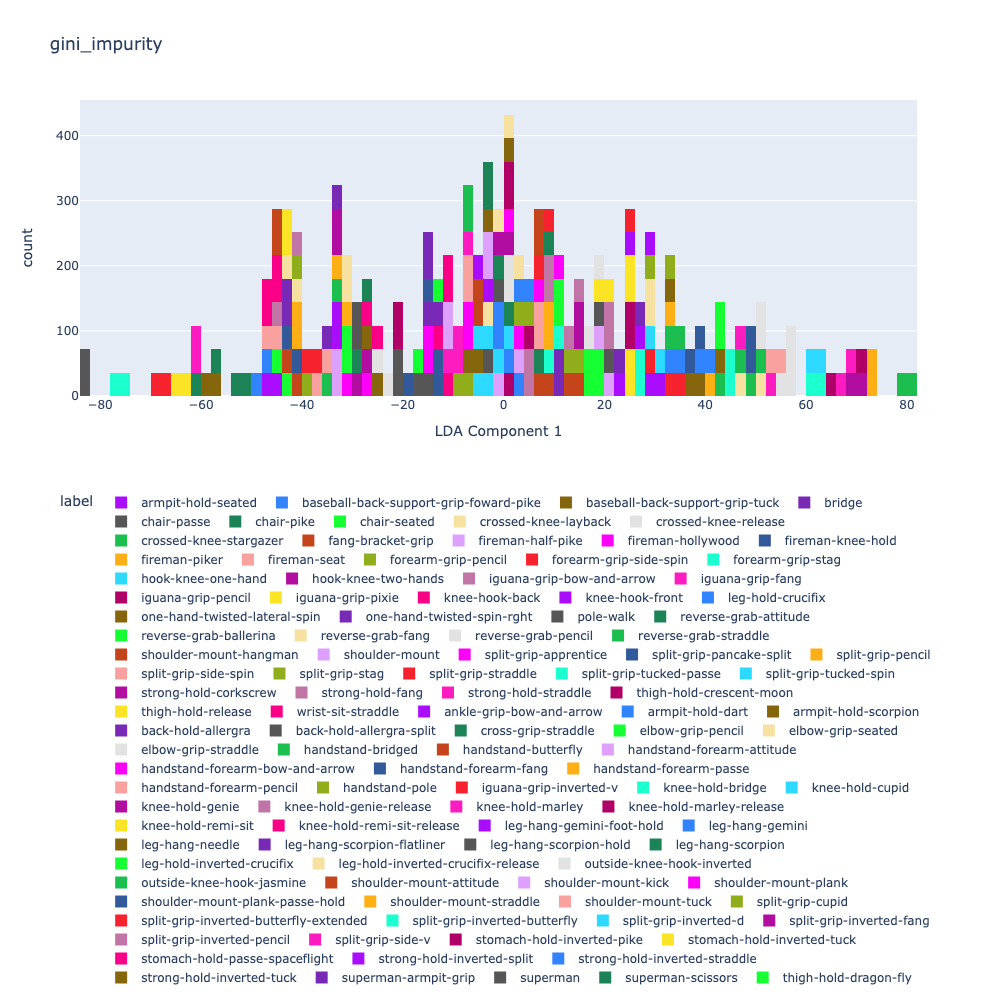

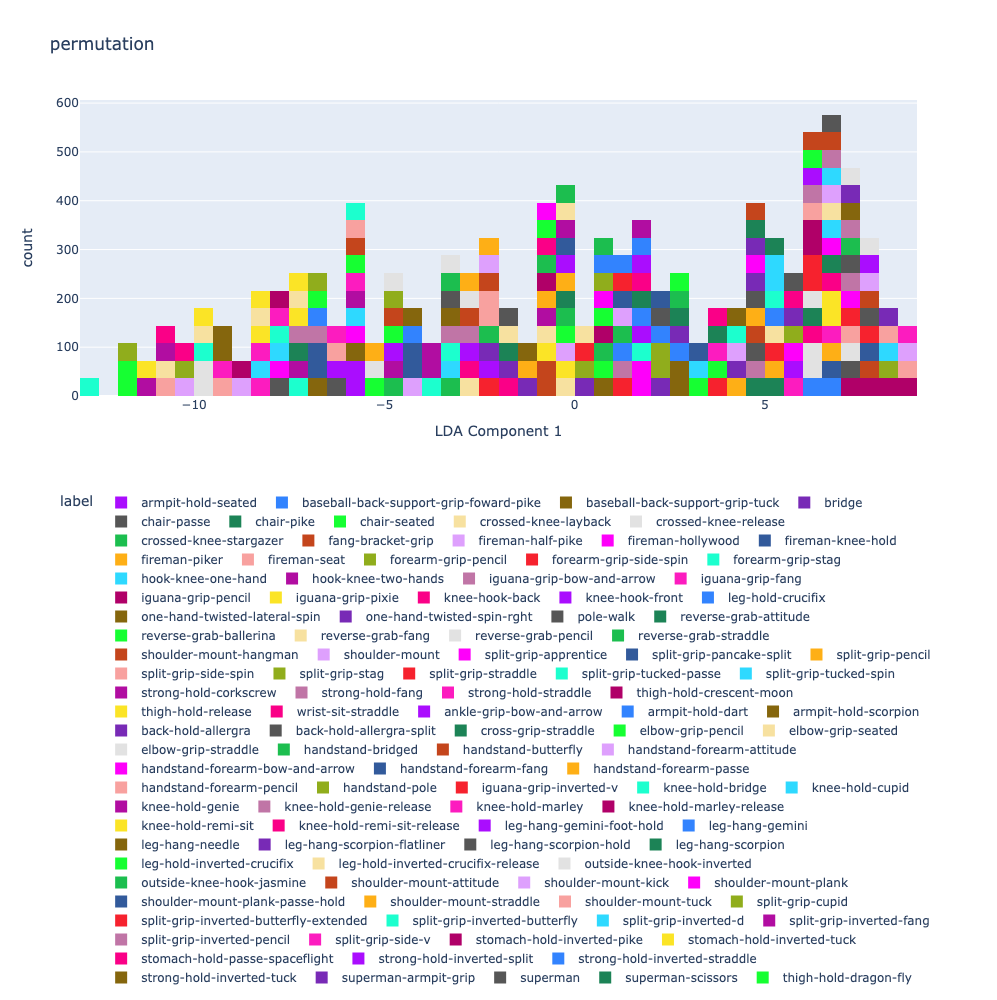

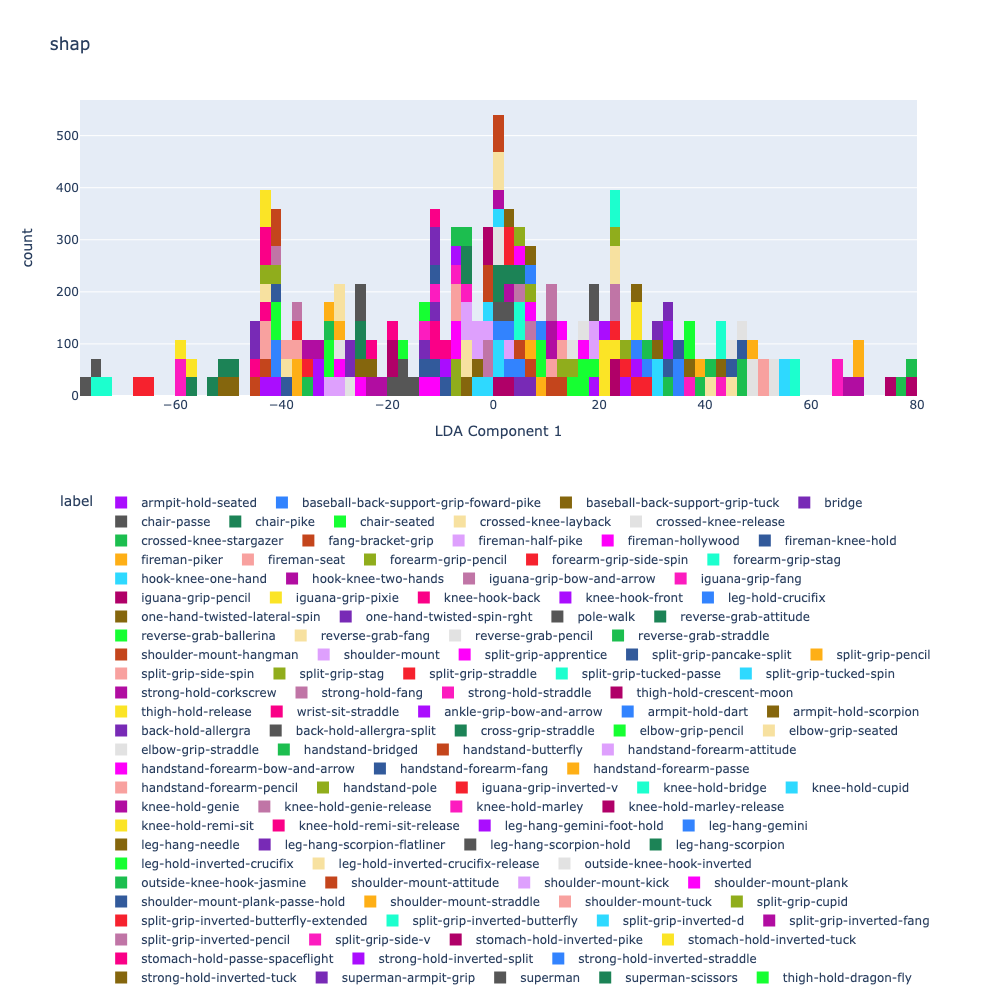

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from data.features import *
from datetime import datetime
import plotly.express as px
import pandas as pd
import numpy as np

def lda_pipeline(X,y,n_components=1,desc="LDA of Pose Features"):

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    X_lda = lda.fit_transform(X_scaled, y)
    
    unique_labels = np.unique(pose_classes)
    palette = px.colors.qualitative.Alphabet
    color_discrete_sequence = (palette * (len(unique_labels) // len(palette) + 1))[:len(unique_labels)]
    
    results_lda = pd.DataFrame(X_lda, columns=[f'LDA{i+1}' for i in range(n_components)])
    results_lda['label'] = pose_classes


    if n_components == 1:
        fig = px.histogram(results_lda, x='LDA1', color='label',
                           title=desc, color_discrete_sequence=color_discrete_sequence)

        fig.update_layout(
            xaxis_title="LDA Component 1",
            xaxis={'categoryorder':'total descending'}
        )
        fig.update_xaxes(categoryorder='total descending')
        
    elif n_components == 2:
        fig = px.scatter(results_lda, x='LDA1', y='LDA2', color='label',
                         title=desc,color_discrete_sequence=color_discrete_sequence)
        fig.update_layout(xaxis_title="LDA Component 1",yaxis_title="LDA Component 2",)
    
    elif n_components == 3:
        results_lda = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2', 'LDA3'])
        results_lda['Label'] = pose_classes
        fig = px.scatter_3d(results_lda, x='LDA1', y='LDA2', z='LDA3', color='label',
                            title=desc,color_discrete_sequence=color_discrete_sequence)
        fig.update_layout(
            scene=dict(
                xaxis_title='LDA Component 1',
                yaxis_title='LDA Component 2',
                zaxis_title='LDA Component 3'
            ),
        )
    else:
        print("only 1,2 or 3")

    fig.update_layout(legend=dict(yanchor='bottom', xanchor='center', y=-2, x=0.5, orientation='h'),height=1000,width=1000,)
    fig.show()
    
    results_lda_means = results_lda.groupby('label')['LDA1'].mean().reset_index()
    results_lda_means.to_csv(f"results/lda_{desc}_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.csv",index=False)
    
lda_pipeline(X1,y1,1,"logistic_regression")
lda_pipeline(X2,y1,1,"gini_impurity")
lda_pipeline(X3,y1,1,"permutation")
lda_pipeline(X4,y1,1,"shap")

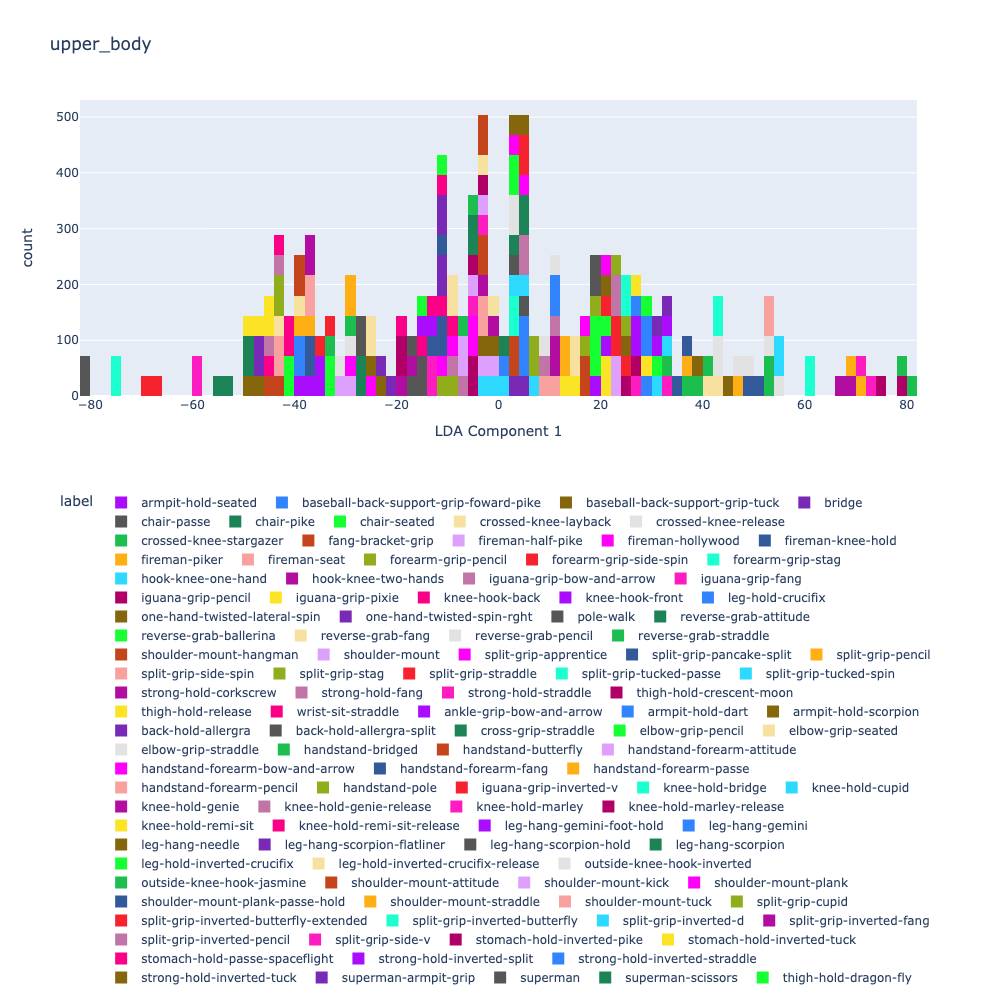

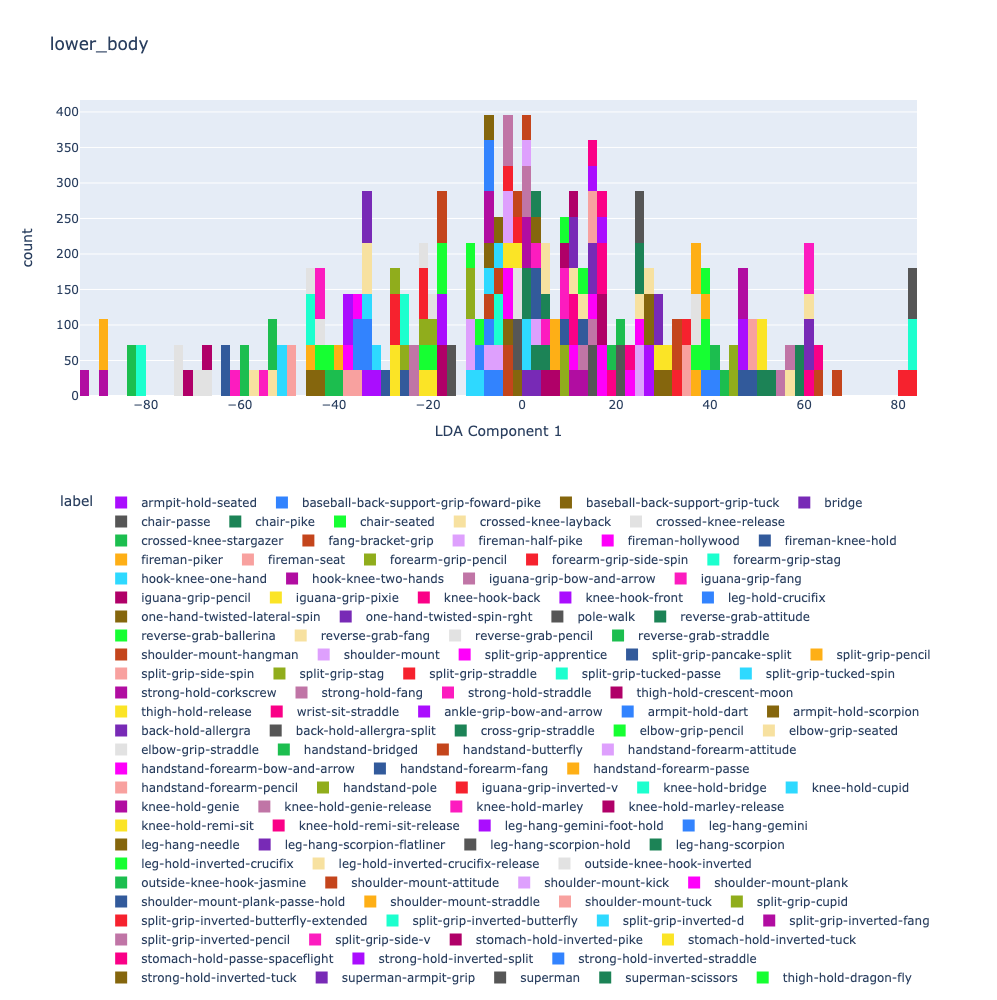

In [39]:
lda_pipeline(X5,y1,1,"upper_body")
lda_pipeline(X6,y1,1,"lower_body")

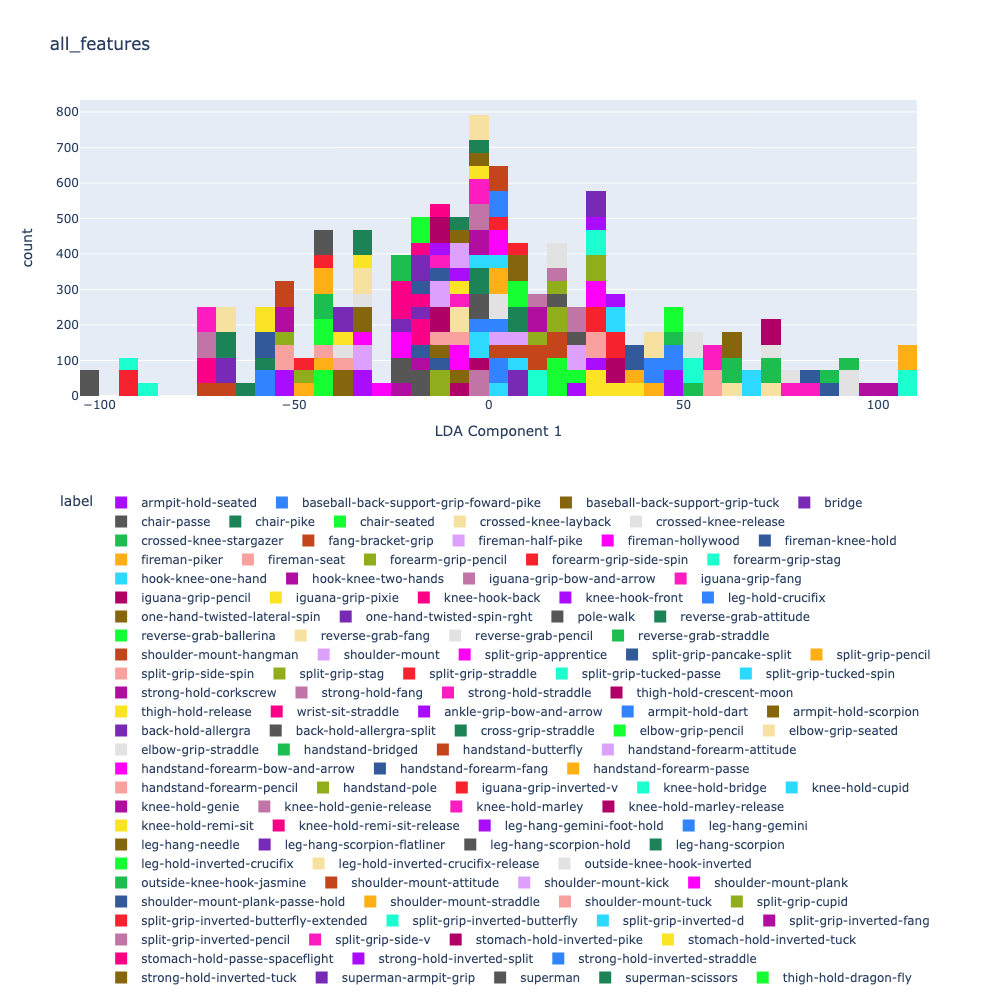

In [41]:
lda_pipeline(X,y1,1,"all_features")

## 3.2.2 KNN Based on Feature Selection

Here, we used the results of the LDA as preprocessing for KNN. We extract 3 unique closest labels to experiment whether they attract the similar poses.

In [107]:
lda_logr = pd.read_csv('results/lda_logistic_regression_2024-03-11_23-09-40.csv')
lda_gini = pd.read_csv('results/lda_gini_impurity_2024-03-11_23-09-41.csv')
lda_perm = pd.read_csv('results/lda_permutation_2024-03-11_23-09-41.csv')
lda_shap = pd.read_csv('results/lda_shap_2024-03-11_23-09-42.csv')
lda_uppr = pd.read_csv('results/lda_upper_body_2024-03-11_23-29-18.csv')
lda_lowr = pd.read_csv('results/lda_lower_body_2024-03-11_23-29-18.csv')
lda_allf = pd.read_csv('results/lda_all_features_2024-03-11_23-31-57.csv')

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=15, metric='euclidean', weights='distance')
knn1.fit(lda_logr[['LDA1']], lda_logr['label'])
distances1, indices1 = knn1.kneighbors(lda_logr[['LDA1']].values)

knn2 = KNeighborsClassifier(n_neighbors=15, metric='euclidean', weights='distance')
knn2.fit(lda_gini[['LDA1']], lda_gini['label'])
distances2, indices2 = knn2.kneighbors(lda_gini[['LDA1']].values)

knn3 = KNeighborsClassifier(n_neighbors=15, metric='euclidean', weights='distance')
knn3.fit(lda_perm[['LDA1']], lda_perm['label'])
distances3, indices3 = knn3.kneighbors(lda_perm[['LDA1']].values)

knn4 = KNeighborsClassifier(n_neighbors=15, metric='euclidean', weights='distance')
knn4.fit(lda_shap[['LDA1']], lda_shap['label'])
distances4, indices4 = knn4.kneighbors(lda_shap[['LDA1']].values)

knn5 = KNeighborsClassifier(n_neighbors=15, metric='euclidean', weights='distance')
knn5.fit(lda_uppr[['LDA1']], lda_uppr['label'])
distances5, indices5 = knn5.kneighbors(lda_uppr[['LDA1']].values)

knn6 = KNeighborsClassifier(n_neighbors=15, metric='euclidean', weights='distance')
knn6.fit(lda_lowr[['LDA1']], lda_lowr['label'])
distances6, indices6 = knn6.kneighbors(lda_lowr[['LDA1']].values)

knn7 = KNeighborsClassifier(n_neighbors=15, metric='euclidean', weights='distance')
knn7.fit(lda_allf[['LDA1']], lda_allf['label'])
distances7, indices7 = knn7.kneighbors(lda_allf[['LDA1']].values)

/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature

In [74]:
def get_closest_classes_and_distances(row_idx, indices, distances, labels, num_closest=3):
    closest_classes_and_distances = []
    for i in range(1, num_closest+1):  # Start from 1 to skip the self-distance (which is 0)
        neighbor_idx = indices[row_idx][i]
        distance = distances[row_idx][i]
        label = labels[neighbor_idx]
        closest_classes_and_distances.append((label, distance))
    return closest_classes_and_distances


k_nearest_indices = np.argsort(distances, axis=1)[:, :k]    
closest_poses = [y_train[indices].tolist() for indices in k_nearest_indices]

In [76]:
results = {'label': lda_logr['label'].tolist()}
results_df = pd.DataFrame(data=results)

for prefix, (indices, distances) in zip(['lda_logr', 'lda_gini', 'lda_perm', 'lda_shap', 'lda_uppr', 'lda_lowr', 'lda_allf'], 
                                        [(indices1, distances1), (indices2, distances2), (indices3, distances3),
                                         (indices4, distances4), (indices5, distances5), (indices6, distances6), 
                                         (indices7, distances7)]):
    lda_results = [get_closest_classes_and_distances(i, indices, distances, lda_logr['label'].values) for i in range(len(lda_logr))]
    # Separate the class and distance information into two columns
    results_df[f'{prefix}_classes'] = [[result[0] for result in row] for row in lda_results]
    results_df[f'{prefix}_distances'] = [[result[1] for result in row] for row in lda_results]

results_df

label  \
0          ankle-grip-bow-and-arrow   
1                  armpit-hold-dart   
2          armpit-hold-forward-pike   
3           armpit-hold-front-split   
4                 armpit-hold-passe   
..                              ...   
136    thigh-hold-dragonfly-crossed   
137              thigh-hold-release   
138                       tuck-hold   
139  twisted-grip-inverted-straddle   
140              wrist-sit-straddle   

                                      lda_logr_classes  \
0    [iguana-grip-pixie, shoulder-mount-princess-gr...   
1    [cross-grip-straddle, shoulder-mount, back-hol...   
2    [fireman-knee-hold, fang-bracket-grip, chair-s...   
3    [hook-knee-one-hand, stomach-hold-vertical-duc...   
4    [bridge, handstand-forearm-passe, split-grip-t...   
..                                                 ...   
136  [shoulder-mount-jack-knife, thigh-hold-release...   
137  [thigh-hold-dragonfly-crossed, split-grip-inve...   
138  [handstand-forearm-fang, handstand-bridged, cr...   
139  [elbow-grip-fang, handstand-tucked, split-grip...   
140  [split-grip-pancake-split, knee-hold-marley, s...   

                                    lda_logr_distances  \
0    [0.6752600773449835, 1.0163304507813002, 1.489...   
1    [0.6159781938455008, 0.6311801257701267, 0.715...   
2    [0.3892538717590952, 0.757126527751673, 0.8428...   
3    [0.29307901882333276, 0.5142541794495248, 0.60...   
4    [0.11708890015376561, 0.21936648966773653, 2.0...   
..                                                 ...   
136  [0.27049305165659376, 0.5982711115605852, 1.20...   
137  [0.5982711115605852, 0.606284483211045, 0.8687...   
138  [0.37510344458426914, 2.2433826940786403, 3.14...   
139  [4.823803338241461, 8.051410879341006, 9.70696...   
140  [0.07200711238323443, 0.13961769111862488, 1.2...   

                                      lda_gini_classes  \
0    [iguana-grip-pixie, shoulder-mount-princess-gr...   
1    [shoulder-mount-pencil, back-hold-allergra-spl...   
2    [knee-hold-remi-sit-release, chair-seated, kne...   
3    [strong-hold-inverted-split, split-grip-backwa...   
4    [knee-hold-genie-release, flag-grip-straddle, ...   
..                                                 ...   
136  [split-grip-inverted-d, leg-hang-gemini-foot-h...   
137  [thigh-hold-crescent-moon, shoulder-mount-prin...   
138  [handstand-bridged, iguana-grip-fang, handstan...   
139  [elbow-grip-fang, split-grip-inverted-fang, ha...   
140  [one-hand-pencil, split-grip-pancake-split, sh...   

                                    lda_gini_distances  \
0    [1.33361630646095, 1.3570916882696764, 1.60841...   
1    [0.03834745521617866, 0.0870830119892061, 1.25...   
2    [0.07102431581648005, 0.392005497905366, 1.294...   
3    [0.051761803629277736, 0.21420043094620755, 0....   
4    [0.20822700316197462, 0.3389366093591182, 0.64...   
..                                                 ...   
136  [0.25395979260943946, 0.6208528077159059, 0.86...   
137  [0.11721364354922059, 0.36853488291919945, 0.3...   
138  [0.8556817378532671, 0.9507139884118061, 2.240...   
139  [6.558263213859462, 9.63889058462621, 11.14448...   
140  [0.4255184568802264, 0.7309967223570819, 0.784...   

                                      lda_perm_classes  \
0    [pole-walk, strong-hold-inverted-straddle, spl...   
1    [shoulder-mount-plank-passe-hold, one-hand-twi...   
2    [split-grip-pancake-split, elbow-grip-inverted...   
3    [shoulder-mount-plank, leg-hold-inverted-cruci...   
4    [knee-hold-marley-release, stomach-hold-duches...   
..                                                 ...   
136  [split-grip-tucked-spin, knee-hold-one-knee-ge...   
137  [split-grip-inverted-butterfly-extended, hands...   
138  [outside-knee-hook-inverted, split-grip-invert...   
139  [fireman-piker, split-grip-backward-split, one...   
140  [cross-grip-straddle, baseball-back-support-gr...   

                                    lda_perm_distances  \
0    [0.1245807945

In [77]:
results_df.to_csv("results/selected_features_with_knn_results.csv",index=False)

## 3.2.3 Weighted KNN

### Set Up

In [152]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split

weights = pd.read_csv('results/feature_weights_20240311.csv')
scaler = MinMaxScaler()
weights = pd.DataFrame(scaler.fit_transform(weights), columns=weights.columns)

X = features
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
weight_models = ['logr', 'gini', 'permutation', 'shap']


landmark_00_x  landmark_00_y  landmark_00_z  landmark_11_x  \
1370       0.877067       0.552530      -0.548641       0.810529   
6422      -0.115979       0.690241       0.262126      -0.351824   
2732       0.615354       0.718541      -0.285062       0.364216   
968        0.366976       0.653036      -0.580679       0.452934   
4013      -0.684116       0.426832       0.168289      -0.503875   
...             ...            ...            ...            ...   
4250       0.727698       0.765119      -0.115786       0.617650   
3239       0.618384       0.492877      -0.097541       0.586671   
7189      -0.403131       0.334435      -0.318872      -0.298200   
4735      -0.348848       0.228009       0.047744      -0.362192   
1892      -0.549483       0.639869       0.361766      -0.417872   

      landmark_11_y  landmark_11_z  landmark_12_x  landmark_12_y  \
1370       0.447366      -0.315455       0.703531       0.578601   
6422       0.587241       0.052330      -0.004782       0.630906   
2732       0.686796      -0.434781       0.681289       0.675372   
968        0.578884      -0.538740       0.541796       0.580224   
4013       0.485677       0.391240      -0.569254       0.345702   
...             ...            ...            ...            ...   
4250       0.659951       0.120758       0.506038       0.745790   
3239       0.474895       0.139392       0.566216       0.608352   
7189       0.328548      -0.502973      -0.675314       0.375544   
4735       0.320764      -0.231251      -0.470370       0.296202   
1892       0.635300      -0.210633      -0.543154       0.566396   

      landmark_12_z  landmark_13_x  ...  d_elbows  d_knees  d_ankles  \
1370      -0.235872       0.935436  ...    0.4070   0.2532    0.2499   
6422       0.520693      -0.553636  ...    1.0209   0.4384    0.6559   
2732      -0.030724       0.299948  ...    0.6479   0.3534    0.2546   
968       -0.249799       0.334483  ...    0.2433   0.1313    0.1430   
4013       0.034564      -0.420226  ...    0.6180   0.4784    0.7123   
...             ...            ...  ...       ...      ...       ...   
4250      -0.096800       0.537165  ...    0.5898   0.6143    0.3090   
3239      -0.052818       0.548692  ...    0.4826   0.5208    0.5479   
7189      -0.255583      -0.265815  ...    0.5776   0.3780    0.4130   
4735       0.247084      -0.294890  ...    0.5722   0.3057    0.2788   
1892       0.230136      -0.472279  ...    0.6670   0.6683    0.6930   

      a_nose_to_rgt_shoulder  a_nose_to_lft_shoulder  a_mid_hip_to_knees  \
1370                 58.5343                121.4657             84.5842   
6422                102.9218                 77.0782            106.7032   
2732                 97.7360                 82.2640            112.7293   
968                  25.2747                154.7253             35.3294   
4013                113.5472                 66.4528            148.1050   
...                      ...                     ...                 ...   
4250                104.9774                 75.0226             60.2794   
3239                122.8114                 57.1886            104.4184   
7189                 68.4642                111.5358             85.6857   
4735                104.4214                 75.5786             64.1150   
1892                164.4894                 15.5106            122.6376   

      a_lft_shoulder_to_wrist  a_lft_hip_to_ankle  a_rgt_shoulder_to_wrist  \
1370                 127.5652             38.1659                 145.6520   
6422                 104.9760            173.8463                 126.5476   
2732                  89.9276            159.6623                  84.3411   
968                  136.2606             43.1421                  97.2067   
4013                 149.3060             67.1750                 130.9188   
...                       ...                 ...                      ...   
4250                  91.6998             26.108

In [142]:
results_df2 = pd.DataFrame({'label': y_test.reset_index(drop=True)})
weight_models = ['logr', 'gini', 'permutation', 'shap']

def get_closest_classes_and_distances(row_idx, indices, distances, labels, num_closest=3):
    closest_classes_and_distances = []
    query_label = labels.iloc[row_idx]

    for i in range(len(indices[row_idx])):
        if len(closest_classes_and_distances) >= num_closest:
            break 

        neighbor_idx = indices[row_idx][i]
        neighbor_label = labels.iloc[neighbor_idx]
        distance = distances[row_idx][i]

        if neighbor_label == query_label or any(neighbor_label == cls for cls, _ in closest_classes_and_distances):
            continue
        closest_classes_and_distances.append((neighbor_label, distance))

    return closest_classes_and_distances

def calculate_distances_and_get_closest_classes(X_train, X_test, y_train, weights, prefix):
    X_train_weighted = X_train * weights
    X_test_weighted = X_test * weights
    distances = pairwise_distances(X_test_weighted, X_train_weighted, metric='euclidean')
    k_nearest_indices = np.argsort(distances, axis=1)
    closest_classes_distances = [
        get_closest_classes_and_distances(i, k_nearest_indices, distances, y_train.reset_index(drop=True), num_closest=4)
        for i in range(len(X_test))
    ]
    
    results_df2[f'{prefix}_classes'] = [[cls for cls, _ in item] for item in closest_classes_distances]
    results_df2[f'{prefix}_distances'] = [[dist for _, dist in item] for item in closest_classes_distances]

for model in weight_models:
    model_weights = weights[model].values
    calculate_distances_and_get_closest_classes(X_train, X_test, y_train, model_weights, model)

In [168]:
results_df2_unique = results_df2.drop_duplicates(subset=['label'], keep='first')
results_df2_unique

label  \
0       shoulder-mount-straddle   
1             leg-hang-scorpion   
2         strong-hold-corkscrew   
3          strong-hold-straddle   
4    handstand-forearm-attitude   
..                          ...   
490  stomach-hold-duchess-passe   
517              shoulder-mount   
555        shoulder-mount-plank   
593             leg-hang-gemini   
672           fang-bracket-grip   

                                          logr_classes  \
0    [shoulder-mount-straddle, iguana-grip-pixie, s...   
1    [leg-hang-scorpion, leg-hang-gemini-foot-hold,...   
2    [strong-hold-corkscrew, fireman-seat, fireman-...   
3    [strong-hold-straddle, cross-grip-straddle, wr...   
4    [handstand-forearm-attitude, handstand-butterf...   
..                                                 ...   
490  [stomach-hold-duchess-passe, knee-hook-front, ...   
517  [shoulder-mount, shoulder-mount-plank-passe-ho...   
555  [shoulder-mount-plank, handstand-forearm-bow-a...   
593  [leg-hang-gemini, elbow-grip-fang, leg-hang-ge...   
672  [fang-bracket-grip, superman-scissors, flag-gr...   

                                        logr_distances  \
0    [4.599716623648189e-14, 1.335528082792796e-14,...   
1    [3.050192214457989e-14, 3.8382752112818626e-14...   
2    [9.442068163657e-15, 2.9548357112719145e-14, 4...   
3    [5.043263350719746e-14, 1.5087829610117108e-14...   
4    [3.908062402200825e-14, 3.2916985143335964e-14...   
..                                                 ...   
490  [4.286366830905075e-14, 4.1579114884428974e-14...   
517  [5.830630421633824e-14, 2.673756865616624e-14,...   
555  [5.648803615034646e-14, 2.6424662833786934e-14...   
593  [2.7979371982810087e-14, 2.6857895108413197e-1...   
672  [3.7240956406726e-14, 2.298384885040501e-14, 2...   

                                          gini_classes  \
0    [shoulder-mount-straddle, split-grip-inverted-...   
1    [leg-hang-scorpion, leg-hang-gemini-foot-hold,...   
2    [strong-hold-corkscrew, fireman-half-pike, spl...   
3    [strong-hold-straddle, cross-grip-straddle, sp...   
4    [handstand-forearm-attitude, handstand-butterf...   
..                                                 ...   
490  [stomach-hold-duchess-passe, stomach-hold-pass...   
517  [shoulder-mount, stomach-hold-vertical-duchess...   
555  [shoulder-mount-plank, split-grip-inverted-pen...   
593  [leg-hang-gemini, leg-hang-scorpion, knee-hold...   
672  [fang-bracket-grip, superman-scissors, flag-gr...   

                                        gini_distances  \
0    [17.509217715452042, 5.842044179561063, 14.159...   
1    [17.466858480754517, 13.639616244146296, 17.88...   
2    [3.929629824991636, 12.771204282986705, 23.210...   
3    [20.952747098034163, 6.595338859481098, 22.980...   
4    [22.893521260367447, 13.566832435575053, 11.18...   
..                                                 ...   
490  [19.952392539981105, 13.664579279275436, 17.31...   
517  [24.34132240176693, 9.705346866265636, 20.6602...   
555  [20.93703271768085, 10.137206534600042, 16.957...   
593  [16.569047895976798, 11.003644180386308, 11.43...   
672  [14.790397642837439, 7.349117073863222, 4.1461...   

                                   permutation_classes  \
0    [shoulder-mount-straddle, iguana-grip-pixie, f...   
1    [leg-hang-scorpion, armpit-hold-dart, strong-h...   
2    [strong-hold-corkscrew, chair-passe, fireman-h...   
3    [strong-hold-straddle, cross-grip-straddle, wr...   
4    [handstand-forearm-attitude, handstand-butterf...   
..                                                 ...   
490  [stomach-hold-duchess-passe, iguana-grip-pixie...   
517  [shoulder-mount, shoulder-mount-plank-passe-ho...   
555  [shoulder-mount-plank, handstand-forearm-penci...   
593  [leg-hang-gemini, leg-hang-gemini-foot-hold, k...   
672  [fang-bracket-grip, flag-grip-straddle, strong...   

                                 permutation_distances  \
0    [113.79086062633243, 68.90827698118082, 96.344...   
1   

In [188]:
import ast 
import networkx as nx
import matplotlib.pyplot as plt

input_keywords = ['handstand']
results_sknn = pd.read_csv('results/results_selected_features_with_knn.csv')
results_wknn = pd.read_csv('results/results_weighted_knn.csv')
filtered_data1 = results_wknn[results_wknn['label'].str.contains('|'.join(input_keywords), na=False)]
filtered_data2 = results_sknn[results_sknn['label'].str.contains('|'.join(input_keywords), na=False)]

results_wknn = filtered_data1
results_sknn = filtered_data2
results_sknn

label  \
37                handstand-bridged   
38              handstand-butterfly   
39       handstand-floor-handspring   
40       handstand-forearm-attitude   
41  handstand-forearm-bow-and-arrow   
42           handstand-forearm-fang   
43          handstand-forearm-passe   
44         handstand-forearm-pencil   
45                handstand-onehand   
46                   handstand-pole   
47                  handstand-split   
48                 handstand-tucked   

                                     lda_logr_classes  \
37  ['crossed-knee-release', 'elbow-grip-inverted-...   
38  ['stomach-hold-inverted-tuck', 'elbow-grip-pen...   
39  ['knee-hold-bridge', 'stomach-hold-inverted-pi...   
40  ['split-grip-inverted-pencil', 'shoulder-mount...   
41  ['knee-hold-genie', 'knee-hold-cupid', 'leg-ho...   
42  ['tuck-hold', 'handstand-bridged', 'crossed-kn...   
43  ['bridge', 'armpit-hold-passe', 'split-grip-tu...   
44  ['split-grip-backward-split', 'armpit-hold-fro...   
45  ['stomach-hold-front-split', 'handstand-split'...   
46  ['elbow-grip-pencil', 'stomach-hold-inverted-t...   
47  ['stomach-hold-front-split', 'handstand-onehan...   
48  ['split-grip-inverted-fang', 'elbow-grip-fang'...   

                                   lda_logr_distances  \
37  [1.2250310011295937, 1.4769209808470407, 2.243...   
38  [0.913627254452674, 0.9466947901892127, 1.1774...   
39  [2.31292336335742, 3.8212657699277983, 5.09046...   
40  [0.7885781151128128, 0.9679293265886031, 1.308...   
41  [0.44172763529345893, 0.5385435602318855, 0.84...   
42  [0.37510344458426914, 2.6184861386629095, 2.76...   
43  [0.10227758951397092, 0.21936648966773653, 2.2...   
44  [0.11633620334394656, 0.7198575080078964, 1.01...   
45  [0.13011909633021013, 0.5346197435984621, 2.90...   
46  [0.23079027359346682, 0.26385780933000547, 1.1...   
47  [0.40450064726825197, 0.5346197435984621, 2.37...   
48  [1.6555539984342431, 3.2276075410995446, 5.861...   

                                     lda_gini_classes  \
37  ['iguana-grip-fang', 'tuck-hold', 'handstand-f...   
38  ['handstand-pole', 'handstand-onehand', 'hands...   
39  ['knee-hold-bridge', 'crossed-knee-release', '...   
40  ['leg-hang-scorpion-hold', 'stomach-hold-inver...   
41  ['stomach-hold-vertical-duchess', 'handstand-f...   
42  ['crossed-knee-layback', 'iguana-grip-fang', '...   
43  ['split-grip-tucked-passe', 'knee-hold-genie-r...   
44  ['stomach-hold-vertical-duchess', 'split-grip-...   
45  ['handstand-split', 'handstand-pole', 'handsta...   
46  ['handstand-onehand', 'handstand-split', 'hand...   
47  ['handstand-onehand', 'handstand-pole', 'hands...   
48  ['stomach-hold-inverted-pike', 'split-grip-inv...   

                                   lda_gini_distances  \
37  [0.09503225055853903, 0.8556817378532671, 1.38...   
38  [0.5917402174165609, 0.735669034544804, 0.8157...   
39  [0.16813030016996322, 4.117925863238511, 5.384...   
40  [0.21647684644130294, 0.4143828565913843, 0.65...   
41  [0.4350817886101934, 0.7077350780501943, 1.015...   
42  [0.5574272986318292, 1.2895314624072824, 1.384...   
43  [0.35972507422002487, 0.4344908676822623, 0.64...   
44  [0.2726532894400009, 0.30770893053701354, 0.70...   
45  [0.08008290537978269, 0.14392881712824313, 0.7...   
46  [0.14392881712824313, 0.2240117225080258, 0.59...   
47  [0.08008290537978269, 0.2240117225080258, 0.81...   
48  [0.9980500804840631, 1.5055912615993492, 4.586...   

                                     lda_perm_classes  \
37  ['stomach-hold-duchess-passe', 'thigh-hold-dra...   
38  ['leg-hang-scorpion-hold', 'knee-hook-front', ...   
39  ['strong-hold-side-split', 'superman-armpit-gr...   
40  ['strong-hold-fang', 'leg-hang-needle', 'stron...   
41  ['split-grip-side-v', 'stomach-hold-inverted-p...   
42  ['hook-knee-one-hand', 'outside-knee-hook-inve...   
43  ['split-grip-tucked-passe', 'fang-bracket-grip...   
44  ['iguana-grip-pencil', 'thigh-hold-crescent-mo...   
45  ['leg-hang-scorpion', 'elbow-grip-but

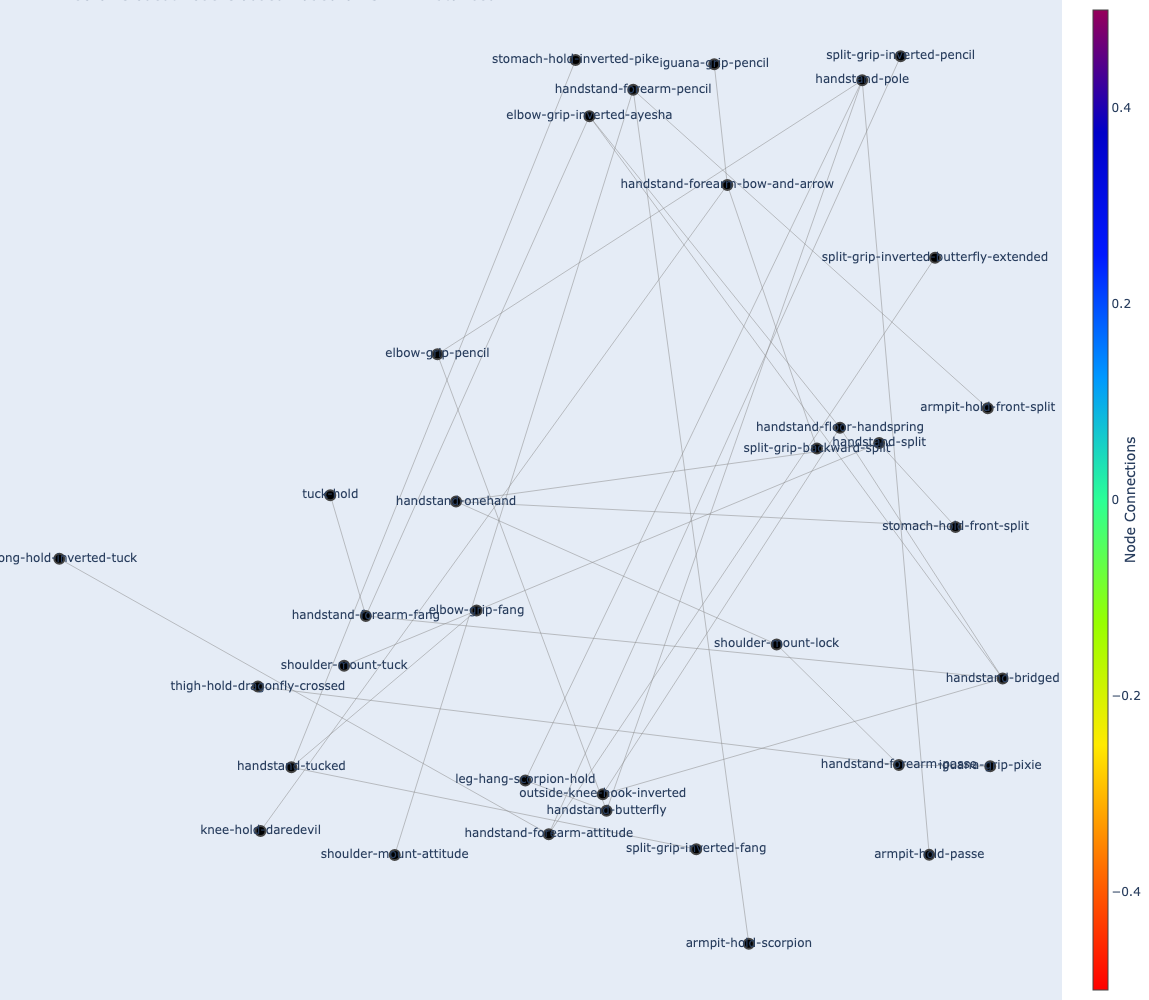

In [190]:
import plotly.graph_objects as go
import networkx as nx

G = nx.Graph()

for _, row in results_sknn.iterrows():
    pose = row['label']
    G.add_node(pose) 
    
    closest_poses = ast.literal_eval(row['lda_uppr_classes'])
    distances = ast.literal_eval(row['lda_uppr_distances'])
    for i in range(len(closest_poses)):
        closest_pose = closest_poses[i]
        distance = distances[i]
        
        if closest_pose == pose or distance == 0:
            continue        
        G.add_edge(pose, closest_pose, weight=distance)


edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None]) 
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=text,
    marker=dict(
        showscale=True,
        colorscale='Rainbow',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                showlegend=False,
                hovermode='closest',
                height=1000,
                width=1000,
                margin=dict(b=0,l=0,r=0,t=0),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.update_layout(title_text="Web of Closest Pose Classes Based on SHAP Distances", title_font_size=16)
fig.show()
